In [1]:
%matplotlib inline  

import numpy as np
import pandas as pd
import sklearn
import sys
import os.path
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
basepath = os.path.dirname(".")
filepath = os.path.abspath(os.path.join(basepath, "..", "data", "train_set.csv"))
print(filepath)

/Users/stephengalsworthy/python/tutorials/ds-complex-models/complex_models_hackaton/code/data/train_set.csv


In [20]:
data=pd.read_csv(filepath, index_col=['sample_uuid'])
traindata=data.copy()

In [4]:
X = data.loc[:, data.columns != 'label'].copy()
y = data.loc[:, 'label'].copy()




In [26]:
X.head(2)

,approx_payout_date,body_length,channels,country,currency,delivery_method,description,email_domain,event_created,event_end,...,ticket_types,user_age,user_created,user_type,venue_address,venue_country,venue_latitude,venue_longitude,venue_name,venue_state
sample_uuid,,,,,,,,,,,,,,,,,,,,,
37d2e927-6060-4d36-b3d1-c2d2d1051827,1320397200,2113,0,US,USD,1.0,<p>It's time to get your kink on for Halloween...,gmail.com,1317831221,1319965200,...,"[{u'event_id': 1299135, u'cost': 10.35, u'avai...",338,1288650682,4,76 Union Place,US,41.769424,-72.681180,NaN,NaN
eddc4b10-5066-4224-b970-90b4acd8ee0c,1367533800,278,12,US,USD,0.0,<p>The opera that conquered London in Handel&r...,murdocktheatre.com,1349762265,1367101800,...,"[{u'event_id': 4542946, u'cost': 24.0, u'avail...",423,1313162870,3,536 N Broadway St,US,37.694706,-97.335055,Murdock Theatre,KS


In [27]:
y.head(2)

sample_uuid
37d2e927-6060-4d36-b3d1-c2d2d1051827    False
eddc4b10-5066-4224-b970-90b4acd8ee0c    False
Name: label, dtype: bool

In [5]:
traindata.describe()

/Users/stephengalsworthy/miniconda3/lib/python3.5/site-packages/numpy/lib/function_base.py:3823: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,approx_payout_date,body_length,channels,delivery_method,event_created,event_end,event_published,event_start,fb_published,gts,...,org_facebook,org_twitter,sale_duration,sale_duration2,show_map,user_age,user_created,user_type,venue_latitude,venue_longitude
count,9.566000e+03,9566.000000,9566.000000,9553.000000,9.566000e+03,9.566000e+03,9.499000e+03,9.566000e+03,9566.000000,9566.000000,...,9522.000000,9522.000000,9458.000000,9566.000000,9566.000000,9566.000000,9.566000e+03,9566.000000,8811.000000,8811.000000
mean,1.350967e+09,3600.076626,6.175099,0.438606,1.345841e+09,1.350535e+09,1.340370e+09,1.350227e+09,0.127744,2537.041253,...,7.988973,4.246377,46.847536,50.645411,0.843926,368.916580,1.313966e+09,2.711478,35.188826,-59.341245
std,2.410850e+07,5625.514468,3.882456,0.592584,2.412321e+07,2.410849e+07,9.136857e+07,2.406528e+07,0.333822,9882.497372,...,11.889382,6.001768,54.972117,59.917121,0.362944,418.061442,4.146082e+07,1.813802,20.408742,67.149592
min,1.171256e+09,0.000000,0.000000,0.000000,1.170332e+09,1.170824e+09,0.000000e+00,1.170819e+09,0.000000,0.000000,...,0.000000,0.000000,-1094.000000,-1094.000000,0.000000,0.000000,1.011210e+09,1.000000,-43.545454,-159.390183
25%,1.334208e+09,726.000000,5.000000,NaN,1.329493e+09,1.333776e+09,NaN,1.333229e+09,0.000000,116.797500,...,NaN,NaN,NaN,17.000000,1.000000,10.000000,1.287200e+09,1.000000,NaN,NaN
50%,1.355867e+09,1926.500000,6.000000,NaN,1.351040e+09,1.355435e+09,NaN,1.355015e+09,0.000000,433.740000,...,NaN,NaN,NaN,35.000000,1.000000,234.000000,1.317307e+09,3.000000,NaN,NaN
75%,1.370646e+09,4246.000000,8.000000,NaN,1.365442e+09,1.370214e+09,NaN,1.370052e+09,0.000000,1545.402500,...,NaN,NaN,NaN,64.000000,1.000000,595.000000,1.346953e+09,3.000000,NaN,NaN
max,1.523488e+09,65535.000000,13.000000,3.000000,1.382012e+09,1.523056e+09,1.381608e+09,1.418850e+09,1.000000,306293.930000,...,91.000000,34.000000,980.000000,980.000000,1.000000,3794.000000,1.381422e+09,103.000000,64.844022,176.169492


In [6]:
corrmat = traindata.corr()

In [7]:
corrmat.iloc[:, 0].abs().sort_values()

venue_latitude        0.007610
event_created         0.011271
gts                   0.022593
object_id             0.026717
event_end             0.046008
approx_payout_date    0.046008
event_start           0.050136
venue_longitude       0.074104
has_header            0.079435
num_order             0.079938
event_published       0.082087
show_map              0.083394
num_payouts           0.085259
has_analytics         0.088825
fb_published          0.098215
body_length           0.121136
name_length           0.156906
channels              0.168627
org_facebook          0.178336
user_created          0.180411
sale_duration2        0.180811
sale_duration         0.181611
has_logo              0.181877
user_type             0.189957
delivery_method       0.196468
org_twitter           0.203320
user_age              0.214598
label                 1.000000
Name: label, dtype: float64

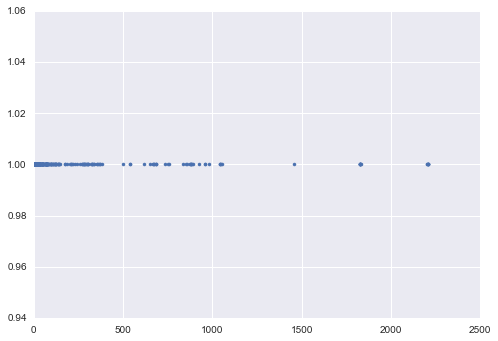

In [35]:

plt.plot(X.user_age[y], y[y], '.')

In [33]:
X.user_age[y].describe()

count     895.000000
mean       89.683799
std       304.743383
min         0.000000
25%         0.000000
50%         0.000000
75%        21.500000
max      2207.000000
Name: user_age, dtype: float64

/Users/stephengalsworthy/miniconda3/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


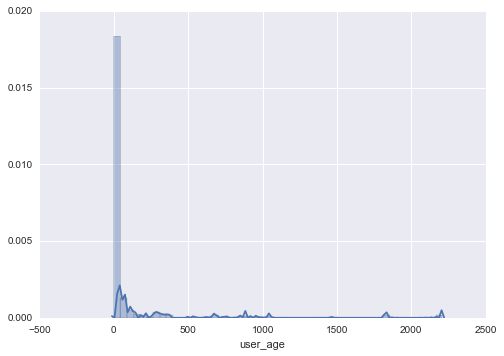

In [36]:
sns.distplot(X.user_age[y])

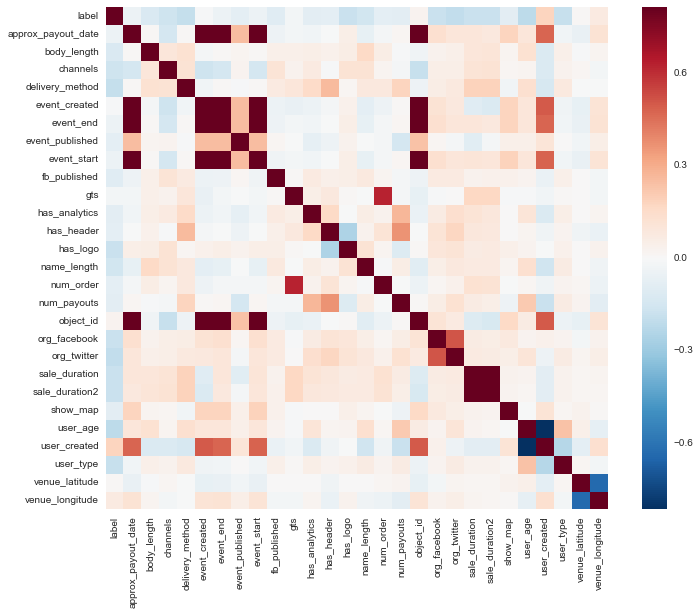

In [8]:
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(12, 9))

# Draw the heatmap using seaborn
sns.heatmap(corrmat, vmax=.8, square=True)

In [9]:
traindata.iloc[0]

label                                                             False
approx_payout_date                                           1320397200
body_length                                                        2113
channels                                                              0
country                                                              US
currency                                                            USD
delivery_method                                                       1
description           <p>It's time to get your kink on for Halloween...
email_domain                                                  gmail.com
event_created                                                1317831221
event_end                                                    1319965200
event_published                                             1.31856e+09
event_start                                                  1319940000
fb_published                                                    

In [10]:
traindata.dtypes

label                    bool
approx_payout_date      int64
body_length             int64
channels                int64
country                object
currency               object
delivery_method       float64
description            object
email_domain           object
event_created           int64
event_end               int64
event_published       float64
event_start             int64
fb_published            int64
gts                   float64
has_analytics           int64
has_header            float64
has_logo                int64
listed                 object
name                   object
name_length             int64
num_order               int64
num_payouts             int64
object_id               int64
org_desc               object
org_facebook          float64
org_name               object
org_twitter           float64
payee_name             object
payout_type            object
previous_payouts       object
sale_duration         float64
sale_duration2          int64
show_map  

In [11]:
import category_encoders
from sklearn.preprocessing import StandardScaler


In [12]:
categorical_cols = X.select_dtypes(include=['object']).columns
categorical_cols = categorical_cols.drop(['previous_payouts', 'ticket_types'])

one_hot_encoder = category_encoders.OneHotEncoder(cols=categorical_cols)



In [13]:
categorical_cols

Index(['country', 'currency', 'description', 'email_domain', 'listed', 'name',
       'org_desc', 'org_name', 'payee_name', 'payout_type', 'venue_address',
       'venue_country', 'venue_name', 'venue_state'],
      dtype='object')

In [14]:
one_hot_encoder

OneHotEncoder(cols=Index(['country', 'currency', 'description', 'email_domain', 'listed', 'name',
       'org_desc', 'org_name', 'payee_name', 'payout_type', 'venue_address',
       'venue_country', 'venue_name', 'venue_state'],
      dtype='object'),
       drop_invariant=False, return_df=True, verbose=0)

In [15]:
one_hot_encoder.fit(X)

KeyboardInterrupt: 

In [17]:
X.head[0]

TypeError: 'method' object is not subscriptable

In [ ]:
X_train_transformed = one_hot_encoder.transform(traindata)

In [ ]:
output_young